In [1]:
### IMPORTANT: RESTART KERNEL AFTER UPDATING THE MODEL TO INVOKE CHANGES! ### 
from model import *
from plotting import *
from analysis import *
import pickle

print_model = True
print_analysis = True

In [2]:
X = 4
# number of voters
N = 100
# number of issues
I_range = [5, 10]
B_range = [0,1,2,3,4,5,9,10]
# number of breaking points

poll_results = [0.3, 0.3, 0.2, 0.2]
random_breaking = False


In [4]:
for I in I_range:
    for B in B_range:        
        if B > I: continue
            
        print("X = {}, N = {}, I = {}, B = {}".format(X, N, I, B))

        grid_results = []

        for i in range(1000):
            agendas = generate_agendas(I, X)
            profile = generate_relative_profile(N, agendas, poll_results)

            vote_results = simulate_vote(agendas, profile, 1)

            supporters = divide_electorate(profile, agendas)
            keys = list(supporters.keys())
            keys.sort()
            no_supporters = [len(supporters[key]) for key in keys]
            # print("Poll results: {}, vote results: {}, supporters: {}".format(poll_results, vote_results, no_supporters))

            if random_breaking: breaking_points = generate_breakingpoints(X, I, B)
            else: breaking_points = derive_breaking_points(B, supporters, agendas)
                

            # print("Breaking points: ", breaking_points)

            possible_coalitions = generate_coalitions(vote_results, agendas, breaking_points)
            # print(possible_coalitions)
            if len(possible_coalitions) == 0:
                grid_results.append([-1, 0, 0])
                continue


            expected_outcomes = simulate_outcomes(vote_results, possible_coalitions, agendas, breaking_points)
            ratings = rate_coalitions(possible_coalitions, agendas, vote_results, expected_outcomes, breaking_points)
            final_expected_outcomes = np.sum([expected_outcomes[c] * ratings[c] for c in range(len(possible_coalitions))],
                                             axis=0)
            # if print_model: print("Final Expected Outcomes:\n{}".format(final_expected_outcomes))
            coalition_ID = form_coalition(ratings)
            # print(coalition_ID)

            coalition = possible_coalitions[coalition_ID]
            # print("Parties formed coalition {}".format(possible_coalitions[coalition_ID]))
            policy = form_policiy(coalition, agendas, vote_results, expected_outcomes[coalition_ID])
            # print("Coalition will implement policy {}".format(policy))

            # Sanity check:
            for index, entry in enumerate(expected_outcomes[coalition_ID]):
                if entry == 1.0:
                    assert policy[index] == 1.0, "SANITY CHECK FAILED! Breaking point violated"
                if entry == 0.0:
                    assert policy[index] == 0.0, "SANITY CHECK FAILED! Breaking point violated"

            regrets = calculate_regret(policy, profile, 2)
           
            grid_results.append([np.mean(regrets), np.std(regrets), len(possible_coalitions)])

            print(i, end='\r')
            

        filename = "{}-{}-{}-{}_b.pickle".format(X,N,I,B)
        with open(filename, 'wb') as handle:
            pickle.dump(grid_results, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("saved.")
        

X = 4, N = 100, I = 5, B = 0
saved.
X = 4, N = 100, I = 5, B = 1


/media/janosch/DATA/Documents/COMSOC/COMSOC_project/model.py:310: RuntimeWarning: invalid value encountered in true_divide
  ratings = ratings/r_sum


saved.
X = 4, N = 100, I = 5, B = 2
saved.
X = 4, N = 100, I = 5, B = 3
saved.
X = 4, N = 100, I = 5, B = 4
saved.
X = 4, N = 100, I = 5, B = 5
saved.
X = 4, N = 100, I = 10, B = 0
saved.
X = 4, N = 100, I = 10, B = 1
saved.
X = 4, N = 100, I = 10, B = 2
saved.
X = 4, N = 100, I = 10, B = 3
saved.
X = 4, N = 100, I = 10, B = 4
saved.
X = 4, N = 100, I = 10, B = 5
saved.
X = 4, N = 100, I = 10, B = 9
saved.
X = 4, N = 100, I = 10, B = 10
saved.


In [22]:
avg_regrets = [] 
regrets_std = [] 
avg_possible_coalitions = []

counter = 0
for B in B_range:
    filename = "4-100-5-{}_b.pickle".format(B)
    with open(filename, 'rb') as handle:
        grid_results = pickle.load(handle)
    # print(filename, "loaded.")
    regrets = [result[0] for result in grid_results]
    avg_regrets.append(np.sum(regrets)/len(regrets))
    regrets_std.append(np.std(regrets))
    no_possible_coalitions = [result[2] for result in grid_results]
    avg_possible_coalitions.append(np.sum(no_possible_coalitions) / len(no_possible_coalitions))
    
    # print(regrets)
    print("With {} breaking points, on average {} coalitions are possible; average agreement is {} with a std of {}".format(B, avg_possible_coalitions[counter], avg_regrets[counter], regrets_std[counter]))
    counter += 1

With 0 breaking points, on average 6.0 coalitions are possible; average agreement is 0.094228 with a std of 0.11769674598730417
With 1 breaking points, on average 1.794 coalitions are possible; average agreement is -0.072232 with a std of 0.3983996914858243
With 2 breaking points, on average 0.231 coalitions are possible; average agreement is -0.76078 with a std of 0.46894504539444704
With 3 breaking points, on average 0.021 coalitions are possible; average agreement is -0.9749399999999999 with a std of 0.1757445771567362
With 4 breaking points, on average 0.0 coalitions are possible; average agreement is -1.0 with a std of 0.0
With 5 breaking points, on average 0.0 coalitions are possible; average agreement is -1.0 with a std of 0.0


FileNotFoundError: [Errno 2] No such file or directory: '4-100-5-9_b.pickle'

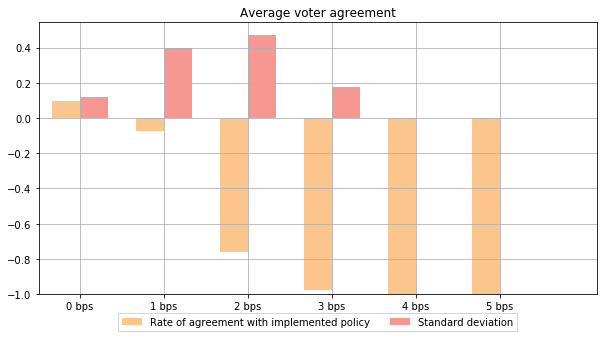

In [23]:
plot_bar_chart_regret(pd.DataFrame([avg_regrets, regrets_std]).T)

[0, 1, 2, 3, 4, 5]
[6.0, 1.794, 0.23100000000000001, 0.021000000000000001, 0.0, 0.0]


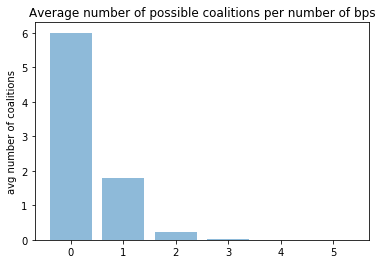

In [24]:
objects = [B for B in B_range if B <= 5]
print(objects)
y_pos = np.arange(len(objects))
print(avg_possible_coalitions)
performance = avg_possible_coalitions
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('avg number of coalitions')
plt.title('Average number of possible coalitions per number of bps')
 
plt.show()

In [15]:
avg_regrets = [] 
regrets_std = [] 
avg_possible_coalitions = []

counter = 0
for B in B_range:
    filename = "4-100-10-{}.pickle".format(B)
    with open(filename, 'rb') as handle:
        grid_results = pickle.load(handle)
    # print(filename, "loaded.")
    regrets = [result[0] for result in grid_results]
    avg_regrets.append(np.sum(regrets)/len(regrets))
    regrets_std.append(np.std(regrets))
    no_possible_coalitions = [result[2] for result in grid_results]
    avg_possible_coalitions.append(np.sum(no_possible_coalitions) / len(no_possible_coalitions))
    
    # print(regrets)
    print("With {} breaking points, on average {} coalitions are possible; average agreement is {} with a std of {}".format(B, avg_possible_coalitions[counter], avg_regrets[counter], regrets_std[counter]))
    counter += 1

With 0 breaking points, on average 6.0 coalitions are possible; average agreement is 0.07772000000000001 with a std of 0.07567510554997595
With 1 breaking points, on average 5.2 coalitions are possible; average agreement is 0.08117999999999999 with a std of 0.08154757875007695
With 2 breaking points, on average 3.12 coalitions are possible; average agreement is 0.024560000000000012 with a std of 0.2937002662579658
With 3 breaking points, on average 1.56 coalitions are possible; average agreement is -0.17463999999999996 with a std of 0.466483601426674
With 4 breaking points, on average 0.54 coalitions are possible; average agreement is -0.522 with a std of 0.5535082293877842
With 5 breaking points, on average 0.28 coalitions are possible; average agreement is -0.7333 with a std of 0.4766841616836037
With 9 breaking points, on average 0.0 coalitions are possible; average agreement is -1.0 with a std of 0.0
With 10 breaking points, on average 0.0 coalitions are possible; average agreement

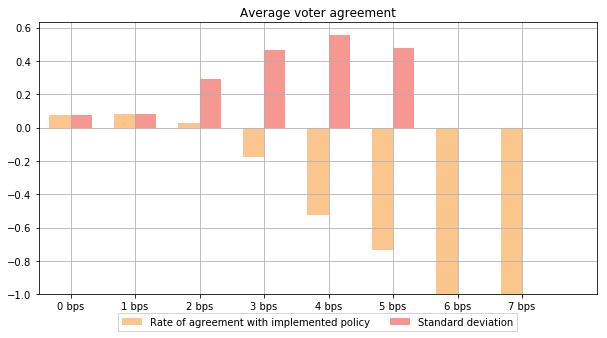

In [16]:
plot_bar_chart_regret(pd.DataFrame([avg_regrets, regrets_std]).T)

[0, 1, 2, 3, 4, 5, 9, 10]


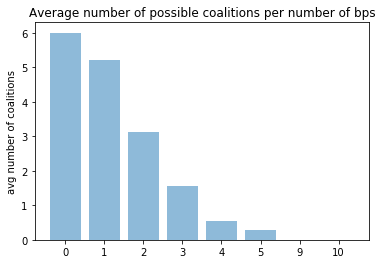

In [17]:
objects = [B for B in B_range if B <= 10]
print(objects)
y_pos = np.arange(len(objects))
performance = avg_possible_coalitions
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('avg number of coalitions')
plt.title('Average number of possible coalitions per number of bps')
 
plt.show()

In [18]:
avg_possible_coalitions = []
avg_regrets = [] 
regrets_std = [] 

counter = 0
for B in B_range:
    filename = "4-100-20-{}.pickle".format(B)
    with open(filename, 'rb') as handle:
        grid_results = pickle.load(handle)
    # print(filename, "loaded.")
    regrets = [result[0] for result in grid_results]
    avg_regrets.append(np.sum(regrets)/len(regrets))
    regrets_std.append(np.std(regrets))
    no_possible_coalitions = [result[2] for result in grid_results]
    avg_possible_coalitions.append(np.sum(no_possible_coalitions) / len(no_possible_coalitions))
    
    # print(regrets)
    print("With {} breaking points, on average {} coalitions are possible; average agreement is {} with a std of {}".format(B, avg_possible_coalitions[counter], avg_regrets[counter], regrets_std[counter]))
    counter += 1

FileNotFoundError: [Errno 2] No such file or directory: '4-100-20-0.pickle'

In [ ]:
plot_bar_chart_regret(pd.DataFrame([avg_regrets, regrets_std]).T)

In [ ]:
objects = [B for B in B_range if B <= 20]
print(objects)
y_pos = np.arange(len(objects))
performance = avg_possible_coalitions
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('avg number of coalitions')
plt.title('Average number of possible coalitions per number of bps')
 
plt.show()